외국인 매매 동향, 달러 지수, 달러 환율 간 상관관계 시각화

In [16]:
# 1. 파일 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

foreign_data = pd.read_excel('foreign invest.xlsx')
index_data = pd.read_excel('dollar index.xlsx')
rate_data = pd.read_excel('dollar rate.xlsx')

foreign = pd.DataFrame(foreign_data) # 2452행
index = pd.DataFrame(index_data) # 2600행
rate = pd.DataFrame(rate_data) # 2462행

In [17]:
# 2. 행이 가장 적은 foreign 기준으로 10년치 데이터 병합

merge1 = pd.merge(foreign, index, on='날짜', how='inner')

ten_years = pd.merge(merge1, rate, on='날짜', how='inner')

ten_years # 2447행

,날짜,외국인 순매수(10억원),달러 인덱스,환율
0,2015-11-26,81,99.80,1145.1
1,2015-11-27,-35,100.02,1145.7
2,2015-11-30,-545,100.17,1150.4
3,2015-12-01,131,99.80,1157.7
4,2015-12-02,-287,99.99,1158.1
...,...,...,...,...
2442,2025-11-19,-1112,100.23,1465.2
2443,2025-11-20,932,100.16,1465.0
2444,2025-11-21,-2950,100.18,1468.4
2445,2025-11-24,-839,100.14,1472.0


In [18]:
# 3. 최근 1년치 데이터 별도 분리

a_year = ten_years[-365:]

a_year # 365행

,날짜,외국인 순매수(10억원),달러 인덱스,환율
2082,2024-05-24,-316,104.72,1364.5
2083,2024-05-27,-77,104.59,1370.0
2084,2024-05-28,142,104.61,1365.4
2085,2024-05-29,-1093,105.10,1359.5
2086,2024-05-30,-739,104.72,1364.8
...,...,...,...,...
2442,2025-11-19,-1112,100.23,1465.2
2443,2025-11-20,932,100.16,1465.0
2444,2025-11-21,-2950,100.18,1468.4
2445,2025-11-24,-839,100.14,1472.0


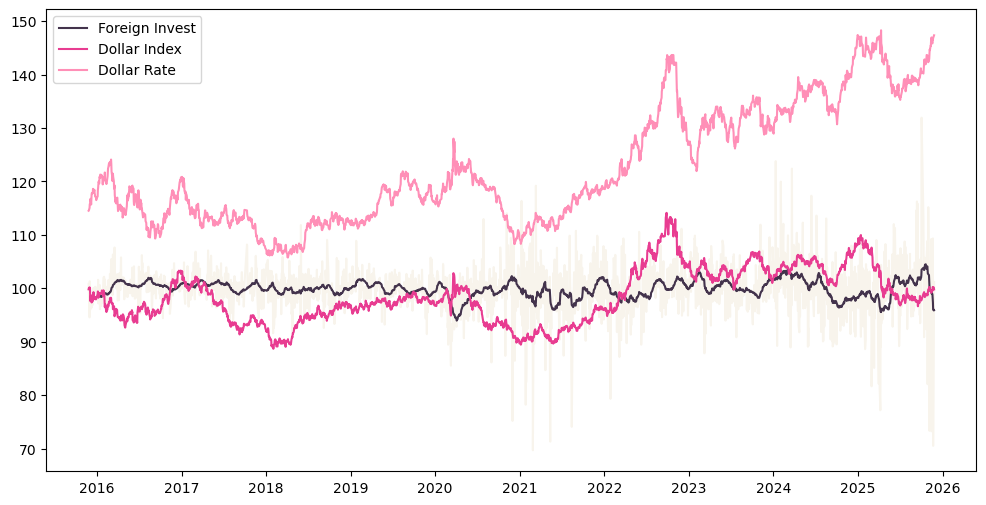

In [22]:
# 4. 세 개 자료 날짜 기준 10년치 선형 그래프 시각화

x = ten_years["날짜"] # X축

raw_y1 = ten_years['외국인 순매수(10억원)']/100 + 100
y1 = raw_y1.rolling(window = 30).mean()

y2 = ten_years['달러 인덱스']
y3 = ten_years['환율']/10

plt.figure(figsize = (12, 6))

# (1) 외국인 순매수 그래프 연하게
plt.plot(x, raw_y1, color = '#F8F4EC')

# (2) 메인 그래프
plt.plot(x, y1, label = 'Foreign Invest', color = '#43334C')
plt.plot(x, y2, label = 'Dollar Index', color = '#E83C91')
plt.plot(x, y3, label = 'Dollar Rate', color = '#FF8FB7')

plt.legend()
plt.show()


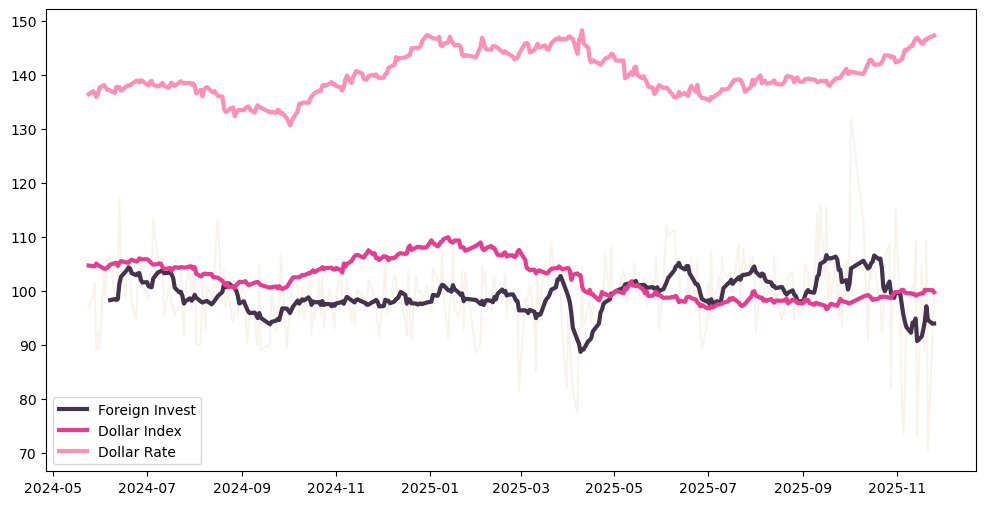

In [23]:
# 4. 세 개 자료 날짜 기준 1년치 선형 그래프 시각화

x2 = a_year["날짜"] # X축

raw_z1 = a_year['외국인 순매수(10억원)']/100 + 100
z1 = raw_z1.rolling(window = 10).mean()

z2 = a_year['달러 인덱스']
z3 = a_year['환율']/10

plt.figure(figsize = (12, 6))

# (1) 외국인 순매수 그래프 연하게
plt.plot(x2, raw_z1, color = '#F8F4EC')

# (2) 메인 그래프
plt.plot(x2, z1, label = 'Foreign Invest', color = '#43334C', linewidth=3)
plt.plot(x2, z2, label = 'Dollar Index', color = '#E83C91', linewidth=3)
plt.plot(x2, z3, label = 'Dollar Rate', color = '#FF8FB7', linewidth=3)

plt.legend()
plt.show()


결론

1. 달러 환율과 달러 인덱스의 관계
기본적 방향이 거의 일치한다. 다만, 2022년 이후 괴리가 커지는 디커플링 현상을 보이고 있다. 따라서 기본적인 환율 변동은 달러 인덱스로 설명 가능하나, 최근의 급격한 환율 상승과 큰 변동성은 정부 정책이나 금융 당국의 환율 방어, 국제 정세, 한미 간 금리차 확대와 같은 복합적 요인에 의해 영향 받고 있다고 판단할 수 있다.

2. 달러 환율과 외국인 매매 동향의 관계
기본적으로 일치하지 않는다. 즉, 뚜렷한 상관관계가 있다고 보기 어렵다. 1년치 데이터에서는 변동성이 적을 때에는 어느 정도 일치하는 모습을 보이나 10년치 데이터로 보았을 때에는 그렇지 않다. 따라서 일률적으로 설명할 수 없다.

3. 최근의 환율 변동 원인에 대한 좀 더 상세한 분석을 위해서는 2009년 리먼 브라더스 사태 당시의 움직임을 추가로 분석해보면 도움이 될 것이라고 판단된다. 2024년 12월 3일 비상계엄 당시 금융 당국은 1480원 이상으로 치솟은 환율을 직접 개입을 통해 1360원까지 낮췄고, 지금도 국민연금과 협력하여 환율 안정에 힘을 쓰고 있다. 리먼 브라더스 사태 당시에도 환율의 급격한 상승이 크게 문제가 되었고, 당시 정부는 미국과 무제한 환율 스와프를 체결하여 환율 안정에 힘썼다. 물론, 리먼 브라더스 사태는 금융위기 사례로, 세계적인 경기 침체의 시작과 부실 채무로 인한 금융 불안정 문제가 복합되어 있는 작금의 상태를 모두 설명하기는 어렵지만, 어느 정도 참고할 수 있다고 사료된다.

끝!